In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "../../data/bulldozers/"

In [4]:
!ls {PATH}

Train.csv


In [5]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [6]:
df_raw.tail

<bound method NDFrame.tail of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246      66000     999089     3157         121           3.0   
1       1139248      57000     117657       77         121           3.0   
2       1139249      10000     434808     7009         121           3.0   
3       1139251      38500    1026470      332         121           3.0   
4       1139253      11000    1057373    17311         121           3.0   
5       1139255      26500    1001274     4605         121           3.0   
6       1139256      21000     772701     1937         121           3.0   
7       1139261      27000     902002     3539         121           3.0   
8       1139272      21500    1036251    36003         121           3.0   
9       1139275      65000    1016474     3883         121           3.0   
10      1139278      24000    1024998     4605         121           3.0   
11      1139282      22500     319906     5255         121

In [7]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [8]:
display_all(df_raw.transpose())

0       \
SalesID                                                    1139246   
SalePrice                                                    66000   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                     3   
YearMade                                                      2004   
MachineHoursCurrentMeter                                        68   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                            1       \
SalesID                                                    1139248   
SalePrice                                                    57000   
MachineID                                                   117657   

In [9]:
display_all(df_raw.describe(include='all').T)

count unique  \
SalesID                   401125    NaN   
SalePrice                 401125    NaN   
MachineID                 401125    NaN   
ModelID                   401125    NaN   
datasource                401125    NaN   
auctioneerID              380989    NaN   
YearMade                  401125    NaN   
MachineHoursCurrentMeter  142765    NaN   
UsageBand                  69639      3   
saledate                  401125   3919   
fiModelDesc               401125   4999   
fiBaseModel               401125   1950   
fiSecondaryDesc           263934    175   
fiModelSeries              56908    122   
fiModelDescriptor          71919    139   
ProductSize               190350      6   
fiProductClassDesc        401125     74   
state                     401125     53   
ProductGroup              401125      6   
ProductGroupDesc          401125      6   
Drive_System              104361      4   
Enclosure                 400800      6   
Forks                     192077      2   
Pad_Type                   79134      4   
Ride_Control              148606      3   
Stick                      79134      2   
Transmission              183230      8   
Turbocharged               79134      2   
Blade_Extension            25219      2   
Blade_Width                25219      6   
Enclosure_Type             25219      3   
Engine_Horsepower          25219      2   
Hydraulics                320570     12   
Pushblock                  25219      2   
Ripper                    104137      4   
Scarifier                  25230      2   
Tip_Control                25219      3   
Tire_Size                  94718     17   
Coupler                   213952      3   
Coupler_System             43458      2   
Grouser_Tracks             43362      2   
Hydraulics_Flow            43362      3   
Track_Type                 99153      2   
Undercarriage_Pad_Width    99872     19   
Stick_Length               99218     29   
Thumb                      99288      3   
Pattern_Changer            99218      3   
Grouser_Type               99153      3   
Backhoe_Mounting           78672      2   
Blade_Type                 79833     10   
Travel_Controls            79834      7   
Differential_Type          69411      4   
Steering_Controls          69369      5   

                                                                        top  \
SalesID                                                                 NaN   
SalePrice                                                               NaN   
MachineID                                                               NaN   
ModelID                                                                 NaN   
datasource                                                              NaN   
auctioneerID                                                            NaN   
YearMade                                                                NaN   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                            Medium   
saledate                                                2009-02-16 00:00:00   
fiModelDesc                                                            310G   
fiBaseModel                                                             580   
fiSecondaryDesc                                                           C   
fiModelSeries                                                            II   
fiModelDescriptor                                                         L   
ProductSize                                                          Medium   
fiProductClassDesc        Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...   
state                                                               Florida   
ProductGroup                                                            TEX   
ProductGroupDesc                                           Track Excavators   
Drive_System                                 

In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [11]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [12]:
train_cats(df_raw)

In [13]:
display_all(df_raw.describe(include='all').T)

count unique  \
SalesID                   401125    NaN   
SalePrice                 401125    NaN   
MachineID                 401125    NaN   
ModelID                   401125    NaN   
datasource                401125    NaN   
auctioneerID              380989    NaN   
YearMade                  401125    NaN   
MachineHoursCurrentMeter  142765    NaN   
UsageBand                  69639      3   
fiModelDesc               401125   4999   
fiBaseModel               401125   1950   
fiSecondaryDesc           263934    175   
fiModelSeries              56908    122   
fiModelDescriptor          71919    139   
ProductSize               190350      6   
fiProductClassDesc        401125     74   
state                     401125     53   
ProductGroup              401125      6   
ProductGroupDesc          401125      6   
Drive_System              104361      4   
Enclosure                 400800      6   
Forks                     192077      2   
Pad_Type                   79134      4   
Ride_Control              148606      3   
Stick                      79134      2   
Transmission              183230      8   
Turbocharged               79134      2   
Blade_Extension            25219      2   
Blade_Width                25219      6   
Enclosure_Type             25219      3   
Engine_Horsepower          25219      2   
Hydraulics                320570     12   
Pushblock                  25219      2   
Ripper                    104137      4   
Scarifier                  25230      2   
Tip_Control                25219      3   
Tire_Size                  94718     17   
Coupler                   213952      3   
Coupler_System             43458      2   
Grouser_Tracks             43362      2   
Hydraulics_Flow            43362      3   
Track_Type                 99153      2   
Undercarriage_Pad_Width    99872     19   
Stick_Length               99218     29   
Thumb                      99288      3   
Pattern_Changer            99218      3   
Grouser_Type               99153      3   
Backhoe_Mounting           78672      2   
Blade_Type                 79833     10   
Travel_Controls            79834      7   
Differential_Type          69411      4   
Steering_Controls          69369      5   
saleYear                  401125    NaN   
saleMonth                 401125    NaN   
saleWeek                  401125    NaN   
saleDay                   401125    NaN   
saleDayofweek             401125    NaN   
saleDayofyear             401125    NaN   
saleIs_month_end          401125      2   
saleIs_month_start        401125      2   
saleIs_quarter_end        401125      2   
saleIs_quarter_start      401125      2   
saleIs_year_end           401125      2   
saleIs_year_start         401125      1   
saleElapsed               401125    NaN   

                                                                        top  \
SalesID                                                                 NaN   
SalePrice                                                               NaN   
MachineID                                                               NaN   
ModelID                                                                 NaN   
datasource                                                              NaN   
auctioneerID                                                            NaN   
YearMade                                                                NaN   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                            Medium   
fiModelDesc                                                            310G   
fiBaseModel                                                             580   
fiSecondaryDesc                                                           C   
fiModelSeries                                                            II   
fiModelDescriptor                                                         L   
Pro

In [14]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [15]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [16]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

In [17]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [18]:
df_raw.UsageBand.unique()

array([ 2,  0,  1, -1])

In [19]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [20]:
os.makedirs('../../tmp', exist_ok=True)
df_raw.to_feather('../../tmp/bulldozers-raw')

In [21]:
df_raw_prep = pd.read_feather('../../tmp/bulldozers-raw')

In [22]:
?proc_df

In [23]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [24]:
df_raw_prep.count()

SalesID                     401125
SalePrice                   401125
MachineID                   401125
ModelID                     401125
datasource                  401125
auctioneerID                380989
YearMade                    401125
MachineHoursCurrentMeter    142765
UsageBand                   401125
fiModelDesc                 401125
fiBaseModel                 401125
fiSecondaryDesc             263934
fiModelSeries                56908
fiModelDescriptor            71919
ProductSize                 190350
fiProductClassDesc          401125
state                       401125
ProductGroup                401125
ProductGroupDesc            401125
Drive_System                104361
Enclosure                   400800
Forks                       192077
Pad_Type                     79134
Ride_Control                148606
Stick                        79134
Transmission                183230
Turbocharged                 79134
Blade_Extension              25219
Blade_Width         

In [25]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/Users/ebalboa/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9831175225387385

In [26]:
#Creating the validation set
#test set --> 
#validation set --> 

def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [27]:
y_valid

array([9.10498, 9.04782, 9.10498, ..., 9.3501 , 9.10498, 8.95545])

In [28]:
y_train

array([11.09741, 10.95081,  9.21034, ..., 10.4631 ,  9.21034,  9.10498])

In [29]:
df_raw

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246  11.097410     999089     3157         121           3.0   
1       1139248  10.950807     117657       77         121           3.0   
2       1139249   9.210340     434808     7009         121           3.0   
3       1139251  10.558414    1026470      332         121           3.0   
4       1139253   9.305651    1057373    17311         121           3.0   
5       1139255  10.184900    1001274     4605         121           3.0   
6       1139256   9.952278     772701     1937         121           3.0   
7       1139261  10.203592     902002     3539         121           3.0   
8       1139272   9.975808    1036251    36003         121           3.0   
9       1139275  11.082143    1016474     3883         121           3.0   
10      1139278  10.085809    1024998     4605         121           3.0   
11      1139282  10.021271     319906     5255         121           3.0   
12      1139283  10.491274    1052214     2232         121           3.0   
13      1139284  10.325482    1068082     3542         121           3.0   
14      1139290  10.239960    1058450     5162         121           3.0   
15      1139291   9.852194    1004810     4604         121           3.0   
16      1139292   9.510445    1026973     9510         121           3.0   
17      1139299   9.159047    1002713    21442         121           3.0   
18      1139301   9.433484     125790     7040         121           3.0   
19      1139304   9.350102    1011914     3177         121           3.0   
20      1139311  10.621327    1014135     8867         121           3.0   
21      1139333  10.448715     999192     3350         121           3.0   
22      1139344  10.165852    1044500     7040         121           3.0   
23      1139346  11.198215     821452       85         121           3.0   
24      1139348  10.404263     294562     3542         121           3.0   
25      1139351   9.433484     833838     7009         121           3.0   
26      1139354   9.648595     565440     7040         121           3.0   
27      1139356  10.878047    1004127    25458         121           3.0   
28      1139357  10.736397      44800    19167         121           3.0   
29      1139358  11.396392    1018076     1333         121           3.0   
...         ...        ...        ...      ...         ...           ...   
401095  6333259   9.259131    1872639    21437         149           1.0   
401096  6333260   9.210340    1816341    21437         149           2.0   
401097  6333261   9.047821    1843949    21437         149           1.0   
401098  6333262   9.259131    1791341    21437         149           2.0   
401099  6333263   9.305651    1833174    21437         149           1.0   
401100  6333264   9.259131    1791370    21437         149           2.0   
401101  6333270   9.210340    1799208    21437         149           1.0   
401102  6333272   9.259131    1927142    21437         149           2.0   
401103  6333273   9.433484    1789856    21437         149           2.0   
401104  6333275   9.259131    1924623    21437         149           2.0   
401105  6333276   9.210340    1835350    21437         149           2.0   
401106  6333278   9.259131    1944702    21437         149           2.0   
401107  6333279   9.433484    1866563    21437         149           2.0   
401108  6333280   9.259131    1851633    21437         149           2.0   
401109  6333281   9.259131    1798958    21437         149           2.0   
401110  6333282   9.259131    1878866    21437         149           2.0   
401111  6333283   9.210340    1874235    21437         149           2.0   
401112  6333284   9.259131    1887654    21437         149           2.0   
401113  6333285   9.259131    1817165    21437         149           2.0   
401114  6333287   9.433484    1918242    21437         149           2.0   
401115  6333290   9.210340    1843374    21437         1

In [30]:
??add_datepart

In [31]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
#predictions,actuals

In [32]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [33]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/Users/ebalboa/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 3s, sys: 651 ms, total: 1min 4s
Wall time: 21.5 s
[0.09054152742703651, 0.24724632160967897, 0.9828671165883597, 0.8908289085464212]


In [34]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(df, y)
m.score(df,y)

/Users/ebalboa/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 6s, sys: 656 ms, total: 1min 7s
Wall time: 23.5 s


0.9830284963997257

In [35]:
### END ML - LESSON1

Speeding things up

In [36]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

#With undersocre I keep my validation set all the time, to be able to compare in each execution

In [37]:
##Intro to Random Forest

##Coeficient of determination
## 1 - (SSres / SStot)

In [38]:
df_trn

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
16      1139292    1026973     9510         121           3.0      1999   
22      1139344    1044500     7040         121           3.0      2005   
39      1139409     999090     3362         121           3.0      1000   
59      1139463    1033597    28920         121           3.0      2006   
64      1139476    1065636     3357         121           3.0      1000   
94      1139542    1003012     1954         121           3.0      1988   
95      1139543    1024992     4794         121           3.0      1996   
113     1139589    1066636      473         121           3.0      2002   
127     1139644    1038747     4128         121           3.0      1000   
135     1139663    1030462     4666         121           3.0      2002   
136     1139664    1003016     6633         121           3.0      2000   
139     1139680    1027261     4579         121           3.0      2002   
167     1139773    1040141     5894         121           3.0      2004   
172     1139787    1005133     4776         121           3.0      2001   
183     1139816     521389     1096         121           3.0      2004   
186     1139823    1019335     4139         121           3.0      1980   
212     1139939     875428     7019         121           3.0      2001   
237     1140030     377421    13391         121           3.0      2005   
243     1140049    1055591     1956         121           3.0      1995   
252     1140075    1059343    14287         121           3.0      2006   
260     1140096    1046445    26202         121           3.0      1994   
263     1140112    1006301      460         121           3.0      2000   
268     1140134    1069472     3217         121           3.0      2001   
315     1140274    1027324     4578         121           3.0      1994   
331     1140321    1009424     3398         121           3.0      2004   
334     1140338     880532     1158         121           3.0      1997   
338     1140346    1004138      663         121           3.0      2001   
341     1140362    1044556    10468         121           3.0      2003   
353     1140409     999981    28608         121           3.0      2004   
356     1140413    1028682     7944         121           3.0      1997   
...         ...        ...      ...         ...           ...       ...   
400749  6320247    1888910    18248         149           1.0      2004   
400753  6320268    1866418    18252         149           1.0      2004   
400763  6320299    1894536     5887         149           1.0      1997   
400771  6320329    1851211     5889         149           1.0      2004   
400775  6320336    1896920     5889         149           1.0      2005   
400815  6320523    1797160     5873         149          16.0      1999   
400853  6321439    1894286    18466         149           1.0      2004   
400902  6324770    1810883    19331         149           1.0      2005   
400913  6327467    1477083    12522         149           1.0      2005   
400918  6327516    1256602    20087         149           1.0      2004   
400933  6327630    1129289    10907         149           1.0      1995   
400937  6327661    1910936    12524         149           1.0      2002   
400965  6327870    1464632    20093         149           1.0      2005   
400975  6327981    1807681    20101         149           1.0      2003   
400980  6327991    1823689    20101         149           1.0      2004   
400982  6327996    1812656    20101         149           1.0      2004   
400995  6328036    1832780    20101         149           1.0      2005   
401017  6328100    1845609    20102         149           1.0      2005   
401019  6328104    1855843    20102         149           1.0      2006   
401029  6328136    1843382    20103         149           1.0      2002   
401033  6328141    1842820    20103         149          99.0      2003   
401038  6328154    1832703    201

In [39]:
# 3.3 Single Tree
# skict-learn trees are estimators

In [40]:
m = RandomForestRegressor(n_estimators = 1 , max_depth= 3, bootstrap= False, n_jobs=1)
m.fit(X_train, y_train)
print_score(m)

[0.5214989449253644, 0.5822715954584479, 0.4050486085998529, 0.3945208626786695]


In [44]:
!pip install graphviz

In [48]:
from graphviz import *

In [ ]:
#  brew install graphviz , if is not installed on your ios

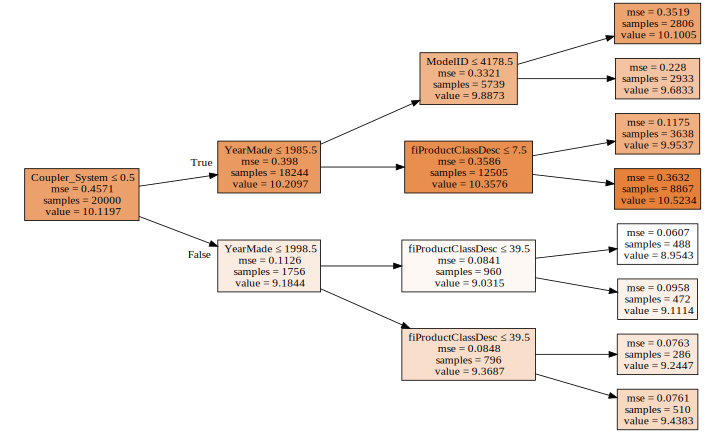

In [53]:
draw_tree(m.estimators_[0], df_trn, precision=4)

In [54]:
m = RandomForestRegressor(n_estimators = 1 , bootstrap= False, n_jobs=1)
m.fit(X_train, y_train)
print_score(m)

[3.7682219008410604e-17, 0.53188565096484, 1.0, 0.4947753607793147]


In [ ]:
#The training set result looks great! But the validation set is worse than our original model.
#This is why we need to use bagging of multiple trees to get more generalizable results.

In [ ]:
#BAGGING (STATISTICAL TECHNIQUE)

In [55]:
??RandomForestRegressor

In [56]:
nas

{'auctioneerID': 2.0, 'MachineHoursCurrentMeter': 0.0}